In [32]:
# Python3 샘플 코드 #


import requests

def get_request_url(YM='201201',NAT_CD='112',ED_CD='E'):
  url = 'http://openapi.tour.go.kr/openapi/service/EdrcntTourismStatsService/getEdrcntTourismStatsList'
  service_key = '인증받은서비스키( 인코더 안되면 디코더로)'
  params ={'serviceKey' : service_key, 'YM' : YM, 'NAT_CD' : NAT_CD, 'ED_CD' : ED_CD }

  return requests.get(url, params=params)

In [40]:
!pip install xmltodict
import xmltodict
import json
import pandas as pd
def getData(yy = '2012'):
  result = []
  for i in range(1,13):
    try:
      ym = yy + str(i).zfill(2)
      response = get_request_url(ym)
      # xml to dic
      dict_data = xmltodict.parse(response.content,encoding='utf-8')

      # dic to json
      json_str = json.dumps(dict_data,indent=4)  # 문자열형태
      json_data = json.loads(json_str) # json 타입

      # response header resultMsg OK

      if json_data["response"]["header"]["resultMsg"] == "OK":
          data = json_data["response"]["body"]["items"]["item"]
          result.append( [ data["ed"], data["edCd"], data["natCd"], data["natKorNm"],data["num"], data["rnum"], data["ym"] ]  )
    except:
      pass

  return pd.DataFrame(result,columns=['a','b','c','d','e','f','g'])

In [42]:
df = pd.concat([getData(str(i)) for i in range(2012,2025)], axis=0)
df

,a,b,c,d,e,f,g
0,방한외래관광객,E,112,중 국,167022,1,201201
1,방한외래관광객,E,112,중 국,173790,1,201202
2,방한외래관광객,E,112,중 국,183691,1,201203
3,방한외래관광객,E,112,중 국,222114,1,201204
4,방한외래관광객,E,112,중 국,210439,1,201205
...,...,...,...,...,...,...,...
1,방한외래관광객,E,112,중 국,343719,1,202402
2,방한외래관광객,E,112,중 국,391347,1,202403
3,방한외래관광객,E,112,중 국,411331,1,202404
4,방한외래관광객,E,112,중 국,395222,1,202405


In [43]:
df.reset_index(drop=True,inplace=True)
df

,a,b,c,d,e,f,g
0,방한외래관광객,E,112,중 국,167022,1,201201
1,방한외래관광객,E,112,중 국,173790,1,201202
2,방한외래관광객,E,112,중 국,183691,1,201203
3,방한외래관광객,E,112,중 국,222114,1,201204
4,방한외래관광객,E,112,중 국,210439,1,201205
...,...,...,...,...,...,...,...
145,방한외래관광객,E,112,중 국,343719,1,202402
146,방한외래관광객,E,112,중 국,391347,1,202403
147,방한외래관광객,E,112,중 국,411331,1,202404
148,방한외래관광객,E,112,중 국,395222,1,202405


No charts were generated by quickchart


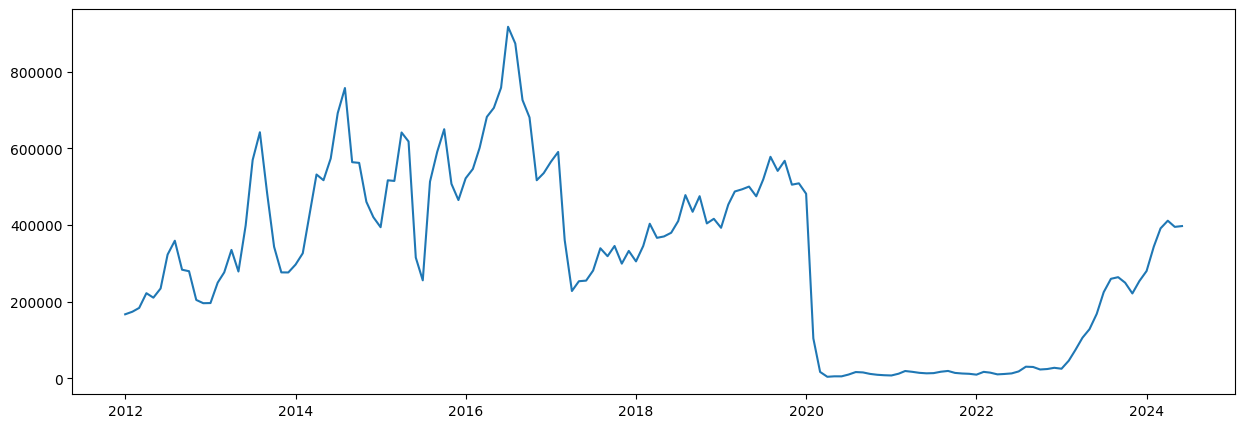

In [51]:
import matplotlib.pyplot as plt
# 년도를 datetime 형식으로 변환
df['g'] = pd.to_datetime(df['g'],format='%Y%m')
df['e'] = pd.to_numeric(df['e'])
plt.figure(figsize=(15,5))
plt.plot(df['g'],df['e'])
plt.show()

In [48]:
df['e']

0      167022
1      173790
2      183691
3      222114
4      210439
        ...  
145    343719
146    391347
147    411331
148    395222
149    397325
Name: e, Length: 150, dtype: object

In [53]:
# 이중 for문으로 개발하기
# 2012  2024
# 201201 ~ 202406
for y in range(2012,2025):
  for m in range(1,13):
    print(str(y)+str(m).zfill(2))

!pip install xmltodict
import xmltodict
import json
import pandas as pd
def getDataAll(start=2012, end=2024):
  result = []
  for y in range(start,end+1):
    for m in range(1,13):
      try:
        ym = str(y)+str(m).zfill(2)
        response = get_request_url(ym)
        # xml to dic
        dict_data = xmltodict.parse(response.content,encoding='utf-8')

        # dic to json
        json_str = json.dumps(dict_data,indent=4)  # 문자열형태
        json_data = json.loads(json_str) # json 타입

        # response header resultMsg OK

        if json_data["response"]["header"]["resultMsg"] == "OK":
            data = json_data["response"]["body"]["items"]["item"]
            result.append( [ data["ed"], data["edCd"], data["natCd"], data["natKorNm"],data["num"], data["rnum"], data["ym"] ]  )
      except:
        pass

  return pd.DataFrame(result,columns=['a','b','c','d','e','f','g'])

201201
201202
201203
201204
201205
201206
201207
201208
201209
201210
201211
201212
201301
201302
201303
201304
201305
201306
201307
201308
201309
201310
201311
201312
201401
201402
201403
201404
201405
201406
201407
201408
201409
201410
201411
201412
201501
201502
201503
201504
201505
201506
201507
201508
201509
201510
201511
201512
201601
201602
201603
201604
201605
201606
201607
201608
201609
201610
201611
201612
201701
201702
201703
201704
201705
201706
201707
201708
201709
201710
201711
201712
201801
201802
201803
201804
201805
201806
201807
201808
201809
201810
201811
201812
201901
201902
201903
201904
201905
201906
201907
201908
201909
201910
201911
201912
202001
202002
202003
202004
202005
202006
202007
202008
202009
202010
202011
202012
202101
202102
202103
202104
202105
202106
202107
202108
202109
202110
202111
202112
202201
202202
202203
202204
202205
202206
202207
202208
202209
202210
202211
202212
202301
202302
202303
202304
202305
202306
202307
202308
202309
202310
202311

네이버 API

In [71]:
# 네이버 검색 API 예제 - 블로그 검색
import os
import sys
import urllib.request
client_id = "client_id"
client_secret = "secret_id"
encText = urllib.parse.quote("연말정산 잘 하는 법")
url = "https://openapi.naver.com/v1/search/kin?query=" + encText + '&display=100' # JSON 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

# title    originallink link description pubDate  컬럼명 데이터프레임으로 정리
# 1. dic형태의 문자열을 json객체로 만들어서
# 2. 리스트로 표현
# 3. 2번을 리스트로 다시 저장 즉 이중리스트
# 4. 데이터프레임함수를 이용해서 생성

{
	"lastBuildDate":"Tue, 30 Jul 2024 21:36:02 +0900",
	"total":92519,
	"start":1,
	"display":100,
	"items":[
		{
			"title":"학자금 대출 상환으로 <b>연말정산<\/b> 많이 받는법",
			"link":"https:\/\/kin.naver.com\/qna\/detail.naver?d1id=4&dirId=40311&docId=473034797&qb=7Jew66eQ7KCV7IKwIOyemCDtlZjripQg67KV&enc=utf8&section=kin.qna&rank=1&search_sort=0&spq=0",
			"description":"... 학자금 대출 상환금액을 교육비 항목으로 <b>연말정산<\/b>에 최대한 활용하기 위해서는 다음과 같은 방법을 고려해볼 수 있습니다. 1. 상환금액 확인: 먼저, 올해에 상환해야 <b>하는<\/b> 총 대출금 중 얼마가 원금이고 얼마가 이자인지 확인합니다.... "
		},
		{
			"title":"개인적으로 <b>연말정산<\/b> <b>하는 법<\/b>",
			"link":"https:\/\/kin.naver.com\/qna\/detail.naver?d1id=4&dirId=40311&docId=468868730&qb=7Jew66eQ7KCV7IKwIOyemCDtlZjripQg67KV&enc=utf8&section=kin.qna&rank=2&search_sort=0&spq=0",
			"description":"... 따라서 연간소득금액 100만원 이하인 기본공제대상자(부양가족)만 <b>잘<\/b> 준비하셔서 신고하시면 됩니다. 아래는 <b>연말정산<\/b>간소화서비스에서 미제공<b>하는<\/b> 항목들이니 혹시 해당되는내용이 있으시면 별도준비하셔야합니다 직접제출)... "
		},
		{
			"title":"<b>연말정산<\/b> 대상인지 확인해 보는 <b>법<\/b>?",
			"link":"https:\/\/ki

In [69]:
# response_body.decode('utf-8')  --> json
import json
json_data = json.loads(response_body.decode('utf-8'))
result = []
for dic_data in json_data['items']:
  result.append([dic_data['title'],dic_data['originallink'],dic_data['link'],dic_data['description'],dic_data['pubDate']])
df = pd.DataFrame(result, columns=['title','originallink','link','description','pubDate'])
df

,title,originallink,link,description,pubDate
0,"[속보] 임종훈-신유빈, <b>올림픽</b> 탁구 혼복 동메달…12년 만의 쾌거",https://www.hankyung.com/article/2024073003357,https://n.news.naver.com/mnews/article/015/000...,임종훈(한국거래소)과 신유빈(대한항공)이 2024 파리 <b>올림픽</b> 혼합복식...,"Tue, 30 Jul 2024 21:29:00 +0900"
1,"'금메달 노렸는데' 여자 에페 단체전, 첫 판서 '개최국' 프랑스에 패배 '개인...",https://sports.chosun.com/sports-news/2024-07-...,https://m.sports.naver.com/general/article/076...,파리<b>올림픽</b> 여자 에페 단체전 8강에서 프랑스에 31대37로 패했다. 2...,"Tue, 30 Jul 2024 21:29:00 +0900"
2,신유빈·임종훈 '12년 만의 쾌거',https://www.news1.kr/photos/6791724,https://n.news.naver.com/mnews/article/421/000...,"=뉴스1) 이동해 기자 = 대한민국 탁구 대표팀 신유빈, 임종훈 선수가 30일(한국...","Tue, 30 Jul 2024 21:28:00 +0900"
3,"[파리 NOW] '생애 첫 <b>올림픽</b> 메달' 임종훈-신유빈, <b>올림픽<...",http://www.maniareport.com/view.php?ud=2024073...,https://m.sports.naver.com/general/article/425...,임종훈(한국거래소)과 신유빈(대한항공)이 2024 파리 <b>올림픽</b> 혼합복식...,"Tue, 30 Jul 2024 21:28:00 +0900"
4,정쟁에 지친 국민에 통쾌한 승전보… <b>올림픽</b> 얘기로 '웃음꽃',https://www.asiatoday.co.kr/view.php?key=20240...,https://www.asiatoday.co.kr/view.php?key=20240...,파리 <b>올림픽</b>'에 대한 소감을 물었더니 이같이 입을 모았다. 점심식사를 ...,"Tue, 30 Jul 2024 21:28:00 +0900"
...,...,...,...,...,...
95,"조성재, 힘찬 출발",https://www.yna.co.kr/view/PYH2024073025520001...,https://m.sports.naver.com/paris2024/article/0...,30일(현지시간) 프랑스 파리 라데팡스 아레나에서 열린 2024 파리<b>올림픽</...,"Tue, 30 Jul 2024 21:20:00 +0900"
96,"수영 조성재, 평영 200ｍ 예선 1위로 준결승행",https://www.obsnews.co.kr/news/articleView.htm...,https://www.obsnews.co.kr/news/articleView.htm...,파리<b>올림픽</b> 수영 대표팀 조성재 선수가 한국 수영 최초로 <b>올림픽</...,"Tue, 30 Jul 2024 21:20:00 +0900"
97,힘차게 물살 가르는 조성재,https://www.yna.co.kr/view/PYH2024073025500001...,https://m.sports.naver.com/paris2024/article/0...,30일(현지시간) 프랑스 파리 라데팡스 아레나에서 열린 2024 파리<b>올림픽</...,"Tue, 30 Jul 2024 21:20:00 +0900"
98,힘차게 물살 가르는 조성재,https://www.yna.co.kr/view/PYH2024073025490001...,https://m.sports.naver.com/paris2024/article/0...,30일(현지시간) 프랑스 파리 라데팡스 아레나에서 열린 2024 파리<b>올림픽</...,"Tue, 30 Jul 2024 21:20:00 +0900"


분양정보

한국부동산원_청약홈 분양정보 조회 서비스

In [93]:
url = 'http://api.odcloud.kr/api/ApplyhomeInfoDetailSvc/v1/getAPTLttotPblancDetail?page=1&perPage=10&serviceKey=발급받은키'
request = urllib.request.Request(url)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{"currentCount":10,"data":[{"BSNS_MBY_NM":"케이비부동산신탁(주)","CNSTRCT_ENTRPS_NM":"롯데건설(주)","CNTRCT_CNCLS_BGNDE":"2024-09-02","CNTRCT_CNCLS_ENDDE":"2024-09-04","GNRL_RNK1_CRSPAREA_ENDDE":"2024-08-09","GNRL_RNK1_CRSPAREA_RCPTDE":"2024-08-09","GNRL_RNK1_ETC_AREA_ENDDE":"2024-08-09","GNRL_RNK1_ETC_AREA_RCPTDE":"2024-08-09","GNRL_RNK1_ETC_GG_ENDDE":null,"GNRL_RNK1_ETC_GG_RCPTDE":null,"GNRL_RNK2_CRSPAREA_ENDDE":"2024-08-12","GNRL_RNK2_CRSPAREA_RCPTDE":"2024-08-12","GNRL_RNK2_ETC_AREA_ENDDE":"2024-08-12","GNRL_RNK2_ETC_AREA_RCPTDE":"2024-08-12","GNRL_RNK2_ETC_GG_ENDDE":null,"GNRL_RNK2_ETC_GG_RCPTDE":null,"HMPG_ADRES":"https://www.lottecastle.co.kr/APT/AT00418/main/index.do","HOUSE_DTL_SECD":"01","HOUSE_DTL_SECD_NM":"민영","HOUSE_MANAGE_NO":"2024000364","HOUSE_NM":"계양 롯데캐슬 파크시티 1단지","HOUSE_SECD":"01","HOUSE_SECD_NM":"APT","HSSPLY_ADRES":"인천광역시 계양구 효성동 101-21번지 일원","HSSPLY_ZIP":"21092","IMPRMN_BSNS_AT":"N","LRSCL_BLDLND_AT":"N","MDAT_TRGET_AREA_SECD":"N","MDHS_TELNO":"16703053","MVN_PREARNGE_YM":"2027